<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/ode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-94a98347ed56>:11: RuntimeWarning: overflow encountered in double_scalars
  xdot = np.array([-0.9*beta*x[0]*x[2],0.9*beta*x[0]*x[2]-alpha*x[1],
<ipython-input-1-94a98347ed56>:29: RuntimeWarning: invalid value encountered in add
  k2 = dt*f(t[k]+dt/2, x[:,k]+k1/2)


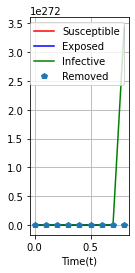

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the General Model
def mselluModel(x,params):
    
    alpha = params["alpha"]
    beta = params["beta"]
    gamma = params["gamma"]
    
    xdot = np.array([-0.9*beta*x[0]*x[2],0.9*beta*x[0]*x[2]-alpha*x[1],
                     alpha*x[1]-gamma*x[2], gamma*x[2]])
    
    return xdot
        
# RK4 Method
def RungeKutta4(f, x0, t0, tf, dt):
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    nx = x0.size
    x = np.zeros((nx,nt))
    
    x[:,0]=x0
    
    for k in range(nt - 1):
        k1 = dt*f(t[k], x[:,k])
        k2 = dt*f(t[k]+dt/2, x[:,k]+k1/2)
        k3 = dt*f(t[k]+dt/2, x[:,k]+k2/2)
        k4 = dt*f(t[k]+dt, x[:,k]+k3)
        
        dx = (k1 + 2*k2+2*k3 + k4)/6
        
        x[:,k+1]=x[:,k] + dx
    return x, t

# Define Problem

params = {"alpha":0.2, "beta":0.7272, "gamma":0.30303}

f = lambda t, x:mselluModel(x,params)

x0 = np.array([1000,200,10,0])

# Solve the Diff.Eq

t0 = 0
tf = 100
dt = 0.1

x, t = RungeKutta4(f, x0,t0,tf,dt)

# Plot results
plt.subplot(1, 3, 1)
plt.plot(t,x[0,:], "r", label = "Susceptible")
plt.plot(t,x[1,:], "b", label = "Exposed")
plt.plot(t,x[2,:], "g", label = "Infective")
plt.plot(t,x[3,:], "p", label = "Removed")
plt.xlabel("Time(t)")
plt.grid()
plt.legend()

plt.show()
    